In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 原文：https://medium.com/%E6%95%B8%E6%93%9A%E4%B8%8D%E6%AD%A2-not-only-data/%E6%B7%B1%E5%85%A5%E6%B7%BA%E5%87%BA-python-%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6-matplotlib-seaborn-%E6%A0%B8%E5%BF%83%E6%8C%87%E5%8D%97%E8%88%87%E7%B9%AA%E8%A3%BD-44a47458912
# https://seaborn.pydata.org/index.html

# How does Seaborn work?

如果你了解深度学习的框架，那`matplotlib`和`Seaborn`的关系就和`Tenserflow`与`Keras`、`Pytorch`与`Fast.ai`的关系一模一样。  
`Seaborn`背后的底层工具仍然是`matplotlib`，但通过封装的方式大幅度地简化许多设定上的细节，而且也美化了图表本身的输出。因此就算只是`import seaborn`本身，也能够提升`matplotlib`的绘图视觉美感。
没事多用seaborn，图表看起来就会更漂亮：  
```python
import seaborn as sns
```

为了让读者感受一下差异，我们下面就实作几个图表来示范。本文会带到下面五个常用的显示方式：
- 使用`seaborn`整`heme`
- arplot 直方图
- Displot 分布密度图
- Regplot 分布密度图
- Pairplot 散佈图矩阵
- Facetgrid 层面图与分组

## 1. 使用`Seaborn`调整`Theme`
可以看到从`seaborn`输出的图明显多了外框，整体视觉也比较好看。因此笔者在后来在进行`EDA`时，若图需要输出都会习惯使用`seaborn`来美化图。
若要在一开始就调整`seaborn`的风格，可以简单地使用`set`来调整：  
```python
sns.set(style="white") # darkgrid, whitegrid, dark, white, ticks
```

## 2. `Barplot`直方图

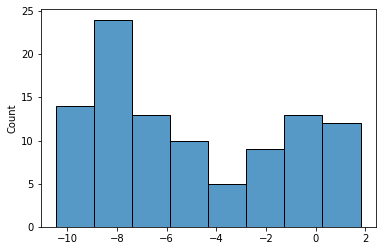

In [2]:
# 生成画布与子图
fig = plt.figure()
axe = fig.add_subplot()

# 生成随机数据
data = np.random.randn(100).cumsum()

# 以seaborn呈现
sns.histplot(data=data)
plt.show()

## 3. `Displot`分布密度图
使用`seaborn`的`displot`时，会同时呈现直方图和密度图，可以更好地去评估分布的组成。

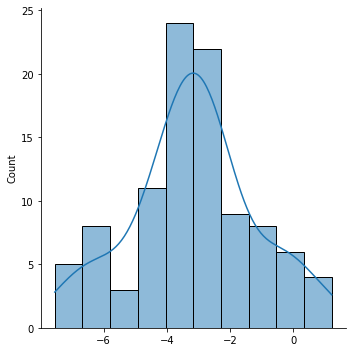

In [3]:
data = np.random.randn(100).cumsum()
sns.displot(data=data, kde=True)

## 4. `Regplot`分布密度图
`Seaborn`的`regplot`可同时绘制出散佈图（scatter）和回归（Regression），可以很快速地评估该资料是否有某种趋势。

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

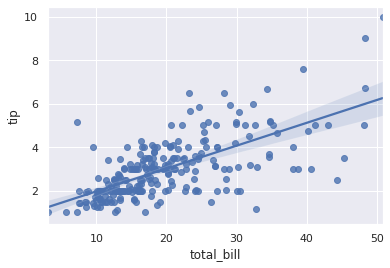

In [4]:
sns.set_theme(color_codes=True)

tips = sns.load_dataset("tips")  # 使用seaborn自带的小费数据集
sns.regplot(x="total_bill", y="tip", data=tips)

## 5. `Pairplot`散佈图矩阵

在探索数据时，若能看到不同参数间的散佈图非常有帮助，但如果一个一个绘制不仅容易忘记，也很难直接看到不同变数间的关联。这时`pairplot`就派上用场了。

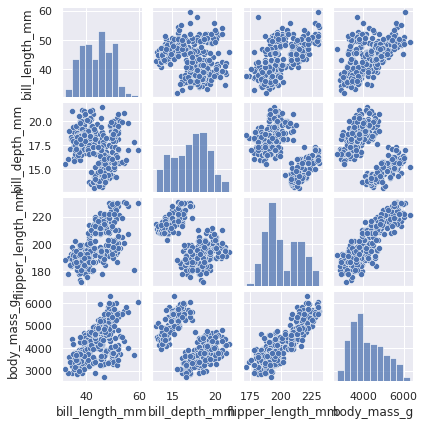

In [5]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, height=1.5)

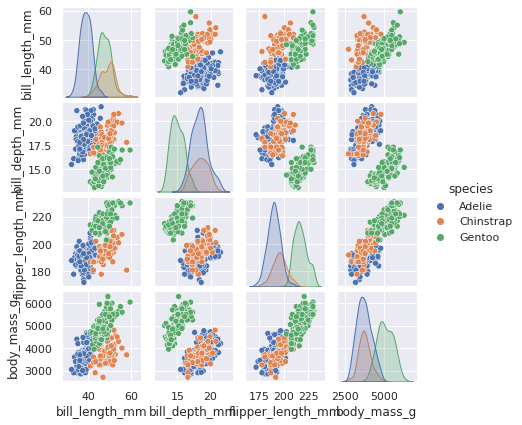

In [6]:
sns.pairplot(penguins, hue="species", height=1.5)

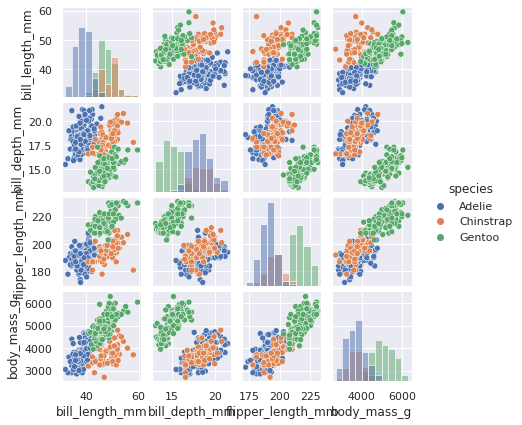

In [7]:
sns.pairplot(penguins, hue="species", diag_kind="hist", height=1.5)

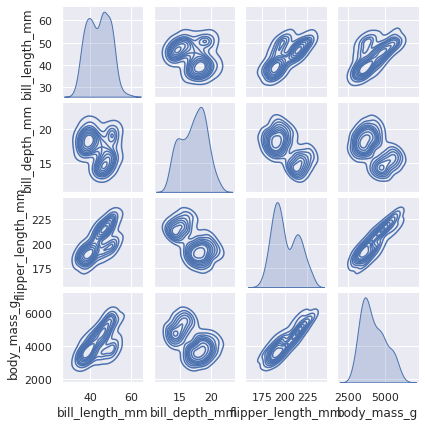

In [8]:
sns.pairplot(penguins, kind="kde", height=1.5)

## 6. `Facetgrid`层面图与分组

我们可以使用`facetgrid`来依照多个分类进行视觉化。

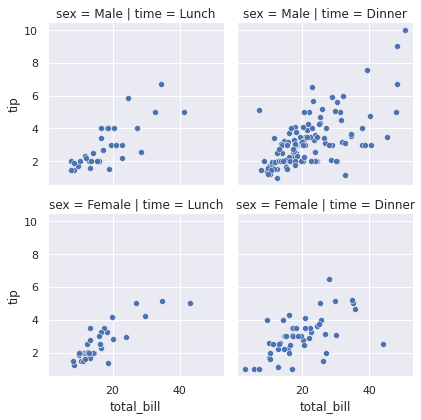

In [9]:
axe = sns.FacetGrid(tips, col="time",  row="sex")
axe.map(sns.scatterplot, "total_bill", "tip")